In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge


In [4]:
dt = pd.read_csv('../../data/processed_data_1.csv')
print(dt.head())

   bhk  type  locality  area  region  status  age  price_in_USD
0    3     0      3019   685       8       0    0      300000.0
1    2     0      4965   640     124       1    0       63012.0
2    2     0      7031   610      31       1    0      207600.0
3    2     0      8484   876     140       1    0       71976.0
4    2     0      4288   659     117       1    0      112932.0


In [5]:
print(dt.shape)

(76038, 8)


In [6]:
print(dt.head())

   bhk  type  locality  area  region  status  age  price_in_USD
0    3     0      3019   685       8       0    0      300000.0
1    2     0      4965   640     124       1    0       63012.0
2    2     0      7031   610      31       1    0      207600.0
3    2     0      8484   876     140       1    0       71976.0
4    2     0      4288   659     117       1    0      112932.0


In [7]:
X = dt.drop(['price_in_USD'], axis = 1)
Y = dt.price_in_USD


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y ,test_size = 0.2, random_state=10)
X_k, X_val, Y_k, Y_val = train_test_split(X, Y, test_size=0.3, random_state=10)

In [9]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [10]:
# Define the Ridge model
ridge = Ridge()

# Set up the parameter grid for alpha
param_grid = {'alpha': np.logspace(-4, 4, 100)}

# Perform grid search with cross-validation
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, Y_train)

# Get the best alpha
best_alpha = ridge_cv.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

Best alpha: 65.79332246575683


In [17]:
from sklearn.model_selection import learning_curve
# Train the Ridge model with the best alpha
ridge_best = Ridge(alpha=best_alpha)
# ridge_best = Ridge(alpha=10.00)
ridge_best.fit(X_train_scaled, Y_train)

# Evaluate the model on the test set
score_test = ridge_best.score(X_test_scaled, Y_test)
print("R-squared on the test set:", score_test)

# Evaluate the model on the train set
score_train = ridge_best.score(X_train_scaled, Y_train)
print("R-squared on the train set:", score_train)

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    ridge_best, X_train_scaled, Y_train, cv=4, train_sizes=np.linspace(0.1, 1.0, 10), scoring="r2"
)

R-squared on the test set: 0.5990890535309326
R-squared on the train set: 0.5961671761140948


In [12]:
# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)


In [13]:
# Print the training scores and cross-validation scores
print("Training scores:\n", train_scores)
print("Cross-validation scores:\n", val_scores)

# Print the mean and standard deviation of training and cross-validation scores
print("Mean training scores:\n", train_scores_mean)
print("Mean cross-validation scores:\n", val_scores_mean)

Training scores:
 [[0.56108123 0.57176161 0.57176161 0.57176161]
 [0.58881871 0.56346293 0.56346293 0.56346293]
 [0.6147934  0.57200707 0.57200707 0.57200707]
 [0.61689349 0.5863489  0.57401962 0.57401962]
 [0.61708031 0.59280803 0.57853546 0.57853546]
 [0.61172936 0.59130021 0.58991515 0.58991515]
 [0.60619933 0.58851393 0.59010205 0.59435234]
 [0.6057272  0.59037877 0.5915219  0.59914771]
 [0.60348766 0.58958166 0.59084377 0.59927394]
 [0.60380343 0.59114409 0.59250075 0.59730866]]
Cross-validation scores:
 [[0.57068707 0.60887794 0.60368179 0.59096746]
 [0.57196806 0.60952694 0.60489362 0.5927442 ]
 [0.57214161 0.60979141 0.60475326 0.59328009]
 [0.57205162 0.61023457 0.60582944 0.59291271]
 [0.57176712 0.61039627 0.60539562 0.59313067]
 [0.57203215 0.61041067 0.60577843 0.59284963]
 [0.57179305 0.61050922 0.60565343 0.59272655]
 [0.57114608 0.6104615  0.60653969 0.59185788]
 [0.5720123  0.61048889 0.60591233 0.59191484]
 [0.57248592 0.61038407 0.60515313 0.59177915]]
Mean training 

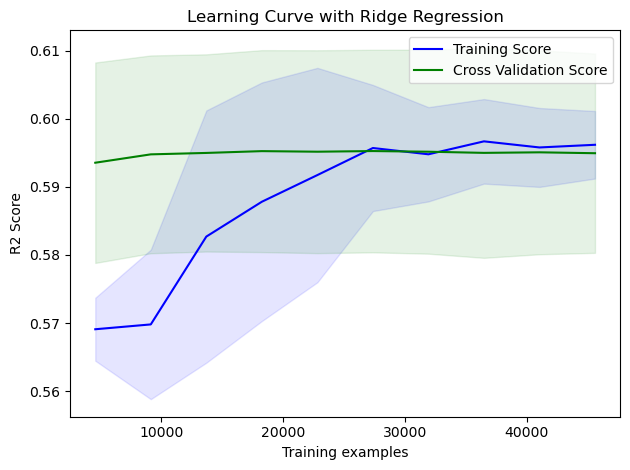

In [14]:
# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training Score", color='b')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='b', alpha=0.1)
plt.plot(train_sizes, val_scores_mean, label="Cross Validation Score", color='g')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color='g', alpha=0.1)

# Adding titles and labels
plt.title("Learning Curve with Ridge Regression")
plt.xlabel("Training examples")
plt.ylabel("R2 Score")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [15]:
# Evaluate the model on the validation set
score_val = ridge_best.score(X_val_scaled, Y_val)
print("R-squared on the validation set:", score_val)

# Make predictions
Y_pred = ridge_best.predict(X_test_scaled)


R-squared on the validation set: 0.587009788530874


       actual value      predicted     difference
7625       198000.0  255291.698747  -57291.698747
75492       90000.0  196520.887423 -106520.887423
66504       39600.0   62024.100559  -22424.100559
52577      120000.0  167623.985978  -47623.985978
38830      612000.0  317102.971812  294897.028188
...             ...            ...            ...
7596       226800.0  295563.414763  -68763.414763
15640      113496.0  249031.463258 -135535.463258
6955        74400.0  226823.771716 -152423.771716
62566      210000.0  325013.784373 -115013.784373
57984      360000.0  312531.698247   47468.301753

[15208 rows x 3 columns]


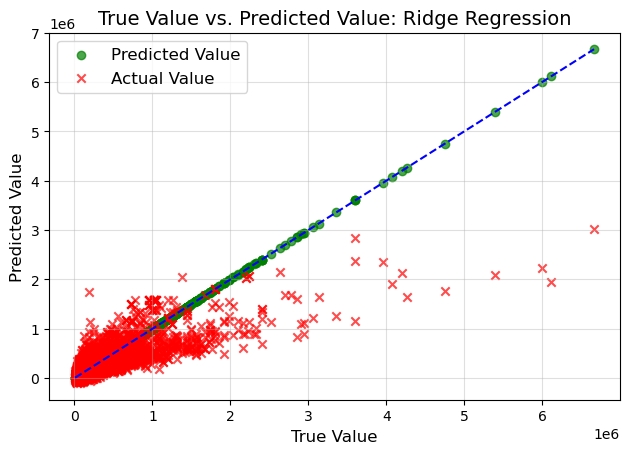

In [16]:
# Create a DataFrame to compare actual and predicted values
pred_table = pd.DataFrame(data={"actual value": Y_test, "predicted": Y_pred})
pred_table["difference"] = pred_table["actual value"] - pred_table["predicted"]
print(pred_table)

# Scatter plot for true vs predicted values
plt.scatter(Y_test, Y_test, c='green', marker='o', label='Predicted Value', alpha=0.7)
plt.scatter(Y_test, Y_pred, c='red', marker='x', label='Actual Value', alpha=0.7)
plt.xlabel("True Value", fontsize=12)
plt.ylabel("Predicted Value", fontsize=12)
plt.title("True Value vs. Predicted Value: Ridge Regression", fontsize=14)
plt.legend(fontsize=12)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='blue')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()